In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# ele é 32x32, diferente do MNIST, que é 28x28
x_train = np.expand_dims(x_train, -1)
x_train = tf.image.resize(x_train, (32, 32))
x_train = tf.image.grayscale_to_rgb(x_train)
x_train = x_train / 255.0

x_test = np.expand_dims(x_test, -1)
x_test = tf.image.resize(x_test, (32, 32))
x_test = tf.image.grayscale_to_rgb(x_test)
x_test = x_test / 255.0

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
def built_lenet5(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential([
        layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape),
        layers.AveragePooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(units=num_classes, activation='softmax'),
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
   

In [6]:
lenet_model = built_lenet5()

c:\Users\zecro\OneDrive\Documents\GitHub\redes-neurais-fiap\.env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = lenet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8676 - loss: 0.4529 - val_accuracy: 0.9700 - val_loss: 0.0941
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9744 - loss: 0.0833 - val_accuracy: 0.9820 - val_loss: 0.0551
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9839 - loss: 0.0510 - val_accuracy: 0.9827 - val_loss: 0.0553
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9888 - loss: 0.0383 - val_accuracy: 0.9836 - val_loss: 0.0473
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9900 - loss: 0.0305 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0220 - val_accuracy: 0.9866 - val_loss: 0.0388
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.

In [9]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.show()


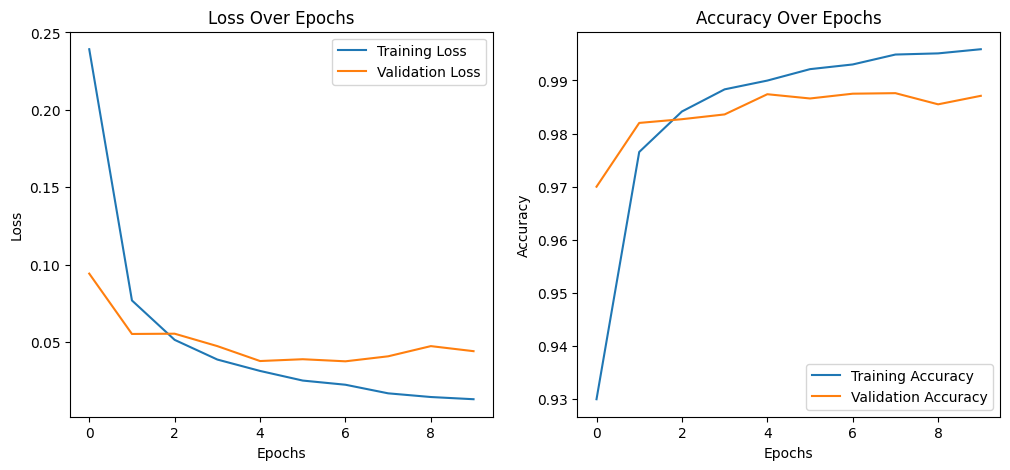

In [10]:
plot_training_history(history)

In [11]:
def print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(title)
    print(conf_matrix)

In [ ]:
pred = lenet_model.predict(x_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - LeNet-5")